In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score
import seaborn as sns
dataset = pd.read_csv("//home//lydianjay//Documents//Data mining//dataset//penguins.csv")
dataset.replace('NA', np.nan, inplace = True)
dataset.replace(' ', np.nan, inplace = True)
dataset.dropna( inplace = True, how = 'any')
dataset = dataset[dataset.sex != '.']

sp = dataset[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g", "sex"]].loc[dataset["species"] == "Adelie"] 

In [17]:

blength_mean = sp["bill_length_mm"].mean()
bmass_mean = sp["body_mass_g"].mean()

bill_length = []

body_mass = []

for d in sp["bill_length_mm"]:
    if d >= blength_mean:
        bill_length.append("Long Bill")
    else:
        bill_length.append("Short Bill")
sp["Bill_Length_Cat"] = bill_length
        

for d in sp["body_mass_g"]:
    if d >= bmass_mean:
        body_mass.append("High mass")
    else:
        body_mass.append("Low mass")

sp["Body_Mass_Cat"] = body_mass


In [18]:
sp.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,Bill_Length_Cat,Body_Mass_Cat
0,39.1,18.7,181.0,3750.0,male,Long Bill,High mass
1,39.5,17.4,186.0,3800.0,female,Long Bill,High mass
2,40.3,18.0,195.0,3250.0,female,Long Bill,Low mass
4,36.7,19.3,193.0,3450.0,female,Short Bill,Low mass
5,39.3,20.6,190.0,3650.0,male,Long Bill,Low mass


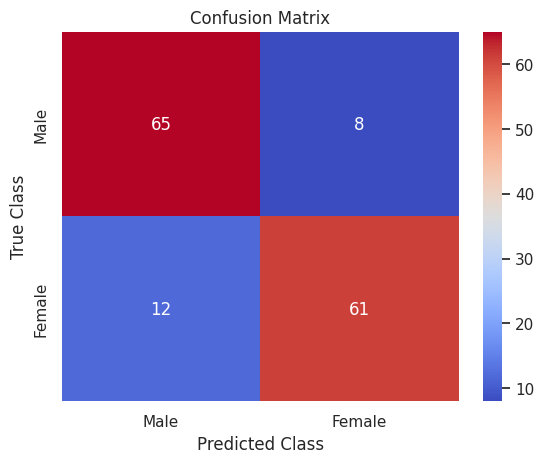

In [21]:
target_variable = 'sex'
predictor_variables = ["Bill_Length_Cat", "Body_Mass_Cat"]

freq_tables = {}

# Loop over predictor variables
for predictor in predictor_variables:
    freq_table = pd.crosstab(sp[predictor], sp[target_variable])
    rules = {}
    for index, row in freq_table.iterrows():
        rules[index] = row.idxmax()
    total_error = sum(freq_table.sum()) - freq_table.max().sum()
    freq_tables[predictor] = {'freq_table': freq_table, 'rules': rules, 'total_error': total_error}

best_predictor = min(freq_tables, key=lambda k: freq_tables[k]['total_error'])
# Calculate the confusion matrix
predictions = [freq_tables[best_predictor]['rules'][value] for value in sp[best_predictor]]
actuals = sp[target_variable]
conf_matrix = confusion_matrix(actuals, predictions)


report = classification_report(actuals, predictions, target_names=['female', 'male'], output_dict=False)


sns.set(font_scale=1)
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 12}, cmap='coolwarm', fmt='g', xticklabels=['Male', 'Female'], yticklabels=['Male', 'Female'])
plt.xlabel('Predicted Class', fontsize=12)
plt.ylabel('True Class', fontsize=12)
plt.title('Confusion Matrix', fontsize=12)
plt.show()

In [22]:
print(report)

              precision    recall  f1-score   support

      female       0.84      0.89      0.87        73
        male       0.88      0.84      0.86        73

    accuracy                           0.86       146
   macro avg       0.86      0.86      0.86       146
weighted avg       0.86      0.86      0.86       146

